## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

In [2]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Helper Methods

Let's code three helper methods:

* random array generator
* array printer
* copyArray

It is assumed that you are fully capable of coding two similar methods by yourself. If you are new to Java (but have some experience with a different language), playing with these methods will help you get familiar with Java faster.

In [3]:
// random array generator
public int[] randomArr(int size) {
    Random r = new Random();
    int[] arr = new int[size];
    
    for (int i = 0; i < size; i++) {
        arr[i] = r.nextInt(1000) + 1;
    }
    
    return arr;
}

// array printer
public void printArr(int[] arr) {
    for (int num : arr) {
        System.out.print(num + " ");
    }
    System.out.println();
}

// array deep copy
public void copyArray(int[] from, int[] to) {
    if (from.length != to.length) {
        System.exit(0);
    }
    
    for (int i = 0; i < from.length; i++) {
        to[i] = from[i];
    }
}

## Quick Sort

**Does the choice of pivot value influence the time complexity of quick sort algorithm?**

Quick sort on average makes Θ(n log n) comparisons to sort n items. In the worst case scenario (*when presented with an already sorted list*), quick sort makes Θ(n^2) comparisons. Here is an implementation of quick sort with pivot value equal to the first item:

In [4]:
// quickSort
public void quickSortFirst(int[] arr, int first, int last) {
    if (first < last) {
        int partitionPoint = partition(arr, first, last);
        quickSortFirst(arr, first, partitionPoint-1);
        quickSortFirst(arr, partitionPoint+1, last);
    }
}

// partition
private int partition(int[] arr, int first, int last) {
    int pivotValue = arr[first];
    int l = first + 1, r = last;
    
    boolean done = false;
    while (!done) {
        while (l <= r && arr[l] <= pivotValue) {
            l++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
        }
        
        if (r < l) {
            done = true;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
        }
    }
    
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    return r;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
quickSortFirst(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);

Given array: 259 232 11 821 334 565 119 455 40 92 
After being sorted: 11 40 92 119 232 259 334 455 565 821 


Quicksort with median-of-three partitioning functions nearly the same as normal quicksort with the only difference being how the pivot item is selected. 

The pivot item with median-of-three partitioning is selected as the median between the first element, the last element, and the middle element (decided using integer division of n/2). 

Here is its implementation:

In [5]:
// quickSort
public void quickSortMedian(int[] arr, int first, int last) {
    if (first < last) {
        int partitionPoint = partition(arr, first, last);
        quickSortMedian(arr, first, partitionPoint-1);
        quickSortMedian(arr, partitionPoint+1, last);
    }
}

// partition
public int partition(int[] arr, int first, int last) {
    // median of three - get the median to middle
    int middle = (first + last) / 2;
    if (arr[middle] < arr[first]) {
        swap(arr, first, middle);
    }
    if (arr[last] < arr[first]) {
        swap(arr, first, last);
    }
    if (arr[last] < arr[middle]) {
        swap(arr, middle, last);
    }
    // get the median to first
    swap(arr, first, middle);
    
    
    int pivotValue = arr[first];
    int l = first + 1, r = last;
    
    boolean done = false;
    while (!done) {
        while (l <= r && arr[l] <= pivotValue) {
            l++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
        }
        
        if (r < l) {
            done = true;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
        }
    }
    
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    return r;
}

// swap
public void swap(int[] arr, int a, int b) {
    int temp = arr[a];
    arr[a] = arr[b];
    arr[b] = temp;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
quickSortMedian(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);

Given array: 297 73 202 393 484 754 258 280 745 591 
After being sorted: 73 202 258 280 297 393 484 591 745 754 


Now let's upgrade both methods to keep track of the running time.

In [6]:
// quickSort trck running time
public int quickSortFirstTrack(int[] arr, int first, int last) {
    int steps = 1;
    
    if (first < last) {
        int[] pair = partitionTrack(arr, first, last);
        int partitionPoint = pair[0];
        steps += pair[1];
        
        steps += quickSortFirstTrack(arr, first, partitionPoint-1);
        steps += quickSortFirstTrack(arr, partitionPoint+1, last);
    }
    
    return steps;
}

// partition
public int[] partitionTrack(int[] arr, int first, int last) {
    int steps = 3;
    
    int pivotValue = arr[first];
    int l = first + 1, r = last;   
    boolean done = false;
    
    while (!done) {
        steps++;
        
        while (l <= r && arr[l] <= pivotValue) {
            l++;
            steps++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
            steps++;
        }
        
        if (r < l) {
            done = true;
            steps++;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
            steps += 3;
        }
    }
    
    steps += 2;
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    int[] results = new int[2];
    results[0] = r;
    results[1] = steps;
    
    return results;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
int steps = quickSortFirstTrack(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);
System.out.println("Steps: " + steps);

Given array: 908 435 350 884 908 588 150 77 250 860 
After being sorted: 77 150 250 350 435 588 860 884 908 908 
Steps: 94


In [7]:
// quickSort Median of Three trck running time
public int quickSortMedianTrack(int[] arr, int first, int last) {
    int steps = 1;
    
    if (first < last) {
        int[] pair = partitionTrack2(arr, first, last);
        int partitionPoint = pair[0];
        steps += pair[1];
        
        steps += quickSortMedianTrack(arr, first, partitionPoint-1);
        steps += quickSortMedianTrack(arr, partitionPoint+1, last);
    }
    
    return steps;
}

// partition
public int[] partitionTrack2(int[] arr, int first, int last) {
    int steps = 8;
    
    // median of three - get the median to middle
    int middle = (first + last) / 2;
    if (arr[middle] < arr[first]) {
        steps += swapTrack(arr, first, middle);
    }
    if (arr[last] < arr[first]) {
        steps += swapTrack(arr, first, last);
    }
    if (arr[last] < arr[middle]) {
        steps += swapTrack(arr, middle, last);
    }
    // get the median to first
    steps += swapTrack(arr, first, middle);
    
    int pivotValue = arr[first];
    int l = first + 1, r = last;   
    boolean done = false;
    
    while (!done) {
        steps++;
        
        while (l <= r && arr[l] <= pivotValue) {
            l++;
            steps++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
            steps++;
        }
        
        if (r < l) {
            done = true;
            steps++;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
            steps += 3;
        }
    }
    
    steps += 2;
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    int[] results = new int[2];
    results[0] = r;
    results[1] = steps;
    
    return results;
}

// swap
public int swapTrack(int[] arr, int a, int b) {
    int steps = 3;

    int temp = arr[a];
    arr[a] = arr[b];
    arr[b] = temp;
    
    return steps;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
int steps = quickSortFirstTrack(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);
System.out.println("Steps: " + steps);

Given array: 516 665 845 574 192 778 594 384 219 235 
After being sorted: 192 219 235 384 516 574 594 665 778 845 
Steps: 92


Now let's plot the comparison between the two on the worst case scenarios of arrays with different lengths. By looking at the comparison, it is easy to conclude that quick sort with median of three strategy is more effective. As the size of input grows, the efficiency difference grows.

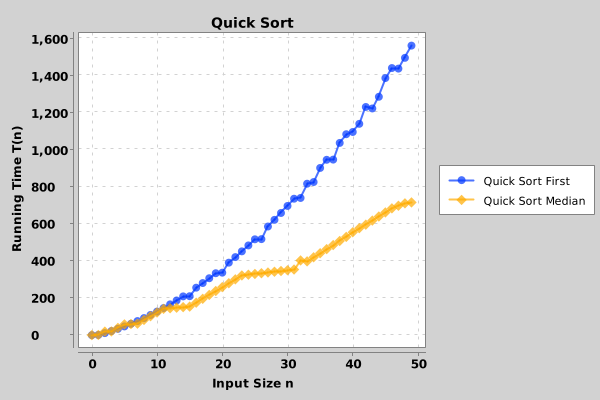

In [8]:
// predetermined size
size = 50;

// storage of steps
int[] quickSortFirstArr = new int[size];
int[] quickSortMedianArr = new int[size];

// populate storage
for (int i = 1; i < size; i++) {
    // prepare two exactly same sorted arrays
    int[] temp1 = randomArr(i);
    Arrays.sort(temp1);
    int[] temp2 = new int[temp1.length];
    copyArray(temp1, temp2);
    
    quickSortFirstArr[i] = quickSortFirstTrack(temp1, 0, i-1);
    quickSortMedianArr[i] = quickSortMedianTrack(temp2, 0, i-1);
}

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// Quick Sort First
double[] yDataB = new double[size];
for (int i = 0; i < yDataB.length; i++) {
    yDataB[i] = quickSortFirstArr[i];
}

// Quick Sort Median
double[] yDataN = new double[size];
for (int i = 0; i < yDataN.length; i++) {
    yDataN[i] = quickSortMedianArr[i];
}

// plot it
XYChart chart = new XYChartBuilder().width(600).height(400).title("Quick Sort").xAxisTitle("Input Size n").yAxisTitle("Running Time T(n)").build();
chart.addSeries("Quick Sort First", xData, yDataB);
chart.addSeries("Quick Sort Median", xData, yDataN);
BitmapEncoder.getBufferedImage(chart);

## Do It Yourself

Can you make a plot comparing the time complexity among: 

* quick sort using 1st element
* quick sort using median of 3 elements
* insertion sort

**When you finish (or not) playing your exploration of the whole interactive notebook and DIY assignment, you should download a html file and upload it to the assignment box on Canvas:**

* File --> Download as --> HTML (.html)

![download](images/html.png)